In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.drop(['area_type','society','balcony','availability','availability'],axis=1,inplace=True)

In [8]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df['bhk'] =  df['size'].apply(lambda x: int(x.split(" ")[0]))

In [14]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def isnum(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df.total_sqft.apply(isnum)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def convert(x):
    token = x.split('-')
    if len(token) == 2:
        return ((float(token[0]) + float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [19]:
df['total_sqft']=df['total_sqft'].apply(lambda x: convert(x))

In [20]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [21]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
3699.810606*1056


3906999.999936

In [23]:
df.location = df.location.apply(lambda x: x.strip())
kf=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
kf

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
locLst = kf[kf<=10]

In [25]:
len(df.location.unique())

1293

In [26]:
df.location =  df.location.apply(lambda x: 'other' if x in locLst else x)

In [27]:
len(df.location.unique())

242

In [28]:
df[df['location'] == 'other']

df.shape

(13246, 7)

In [29]:

df.drop(df[df.total_sqft/df.bhk < 300 ].index,inplace=True)

In [30]:
df.shape

(12502, 7)

In [31]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [32]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10241, 7)

In [34]:
def drawPlot(df,location):
    bhk2  =  df[(df.location == location) & (df.bhk == 2)]
    bhk3  =  df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft,bhk2.price,label='2BHK',color='g' ,marker='*')
    plt.scatter(bhk3.total_sqft,bhk3.price,label='3BHK' ,color='r',marker='o') 
    plt.title(location)
    plt.legend()
    plt.xlabel("total sqft")
    plt.ylabel("Price")

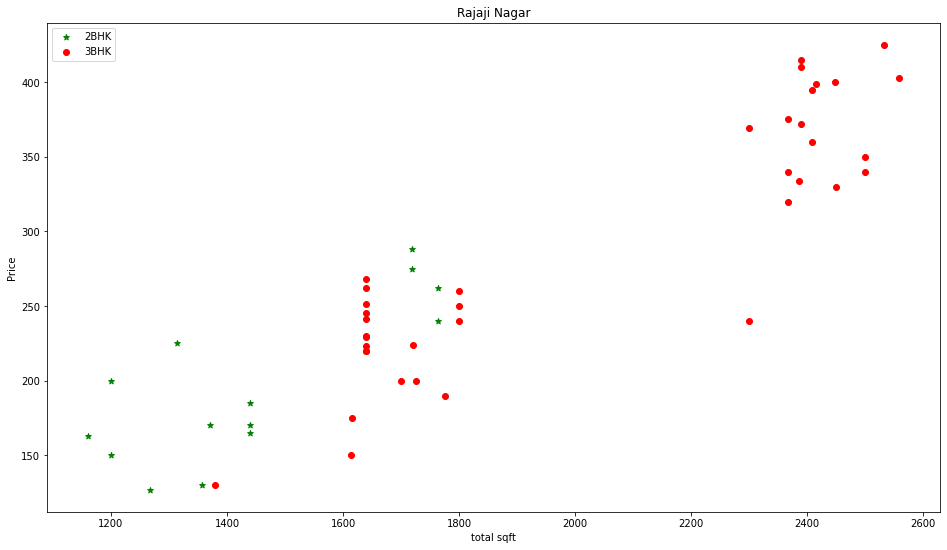

In [35]:
drawPlot(df,'Rajaji Nagar')


In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
# df8 = df7.copy()
df.shape

(7329, 7)

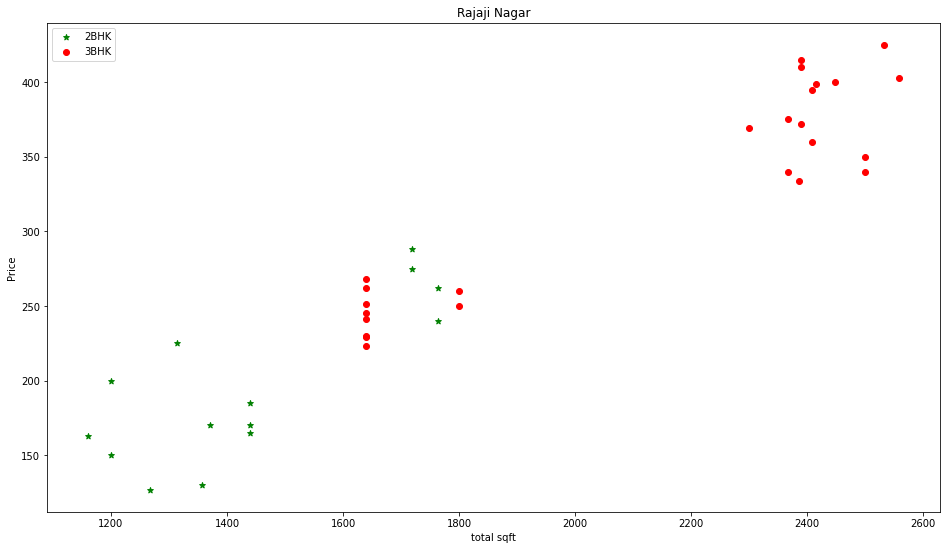

In [37]:
drawPlot(df,'Rajaji Nagar')

In [38]:
df.drop(df[df.bath > df.bhk + 2].index,inplace=True)

In [39]:
df.shape

(7325, 7)

In [40]:
df.drop(['size','price_per_sqft'],axis=1,inplace=True)

In [86]:
dummies = pd.get_dummies(df.location)


In [87]:
ndf = pd.concat([df,dummies.drop('other',axis=1)],axis=1)

In [88]:
ndf.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=246)

In [89]:
ndf.drop('location',axis=1,inplace=True)

In [90]:
ndf

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
ndf.shape

(7325, 245)

# Buliding the model

In [92]:
x =  ndf.drop('price',axis=1)
y =  ndf.price

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [95]:
model = LinearRegression()

In [96]:
model.fit(xtrain,ytrain)

LinearRegression()

In [97]:
model.score(xtest,ytest)

0.865767454123605

In [98]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [99]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

In [100]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\python3.9\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\python3.9\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardS

,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': True}
1,lasso,0.684349,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743336,"{'criterion': 'mse', 'splitter': 'best'}"


In [112]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    xt = np.zeros(len(x.columns))
    xt[0] = sqft
    xt[1] = bath
    xt[2] = bhk
    if loc_index >= 0:
        xt[loc_index] = 1

    return model.predict([xt])[0]

In [113]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\python3.9\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.20883110348419

# Saving The Model

In [103]:
import pickle
with open('Mymodel.pickle','wb') as f:
    pickle.dump(model,f)

In [134]:
import json
columns = {
    'data_columns' : [col for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))




In [115]:

ndf.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

In [116]:
ndf.shape

(7325, 245)

{'data_columns': [2850,
  1630,
  1875,
  1200,
  1235,
  2750,
  2450,
  1500,
  2065,
  2059,
  1394,
  1077,
  1566,
  840,
  1590,
  2180,
  1180,
  2077,
  1205,
  900,
  1450,
  1150,
  1350,
  1681,
  3000,
  2400,
  1206,
  1270,
  1312,
  1100,
  3600,
  5100,
  1075,
  1256,
  1207,
  1725,
  1440,
  1700,
  2500,
  600,
  1390,
  1000,
  552,
  1030,
  1190,
  4000,
  1080,
  1041,
  812,
  1010,
  1192,
  3245,
  1645,
  1140,
  2040,
  1213,
  1216,
  1460,
  2003,
  1810,
  1515,
  1280,
  1420,
  1850,
  1245,
  1175,
  1400,
  2225,
  1050,
  918,
  1680,
  980,
  2503,
  2200,
  1575,
  1215,
  1300,
  1130,
  1275,
  1650,
  850,
  1236,
  1675,
  1187,
  1120,
  1790,
  1040,
  1800,
  2095,
  1976,
  1600,
  1765,
  750,
  990,
  1430,
  1128,
  1530,
  1073,
  451,
  1062,
  1455,
  871,
  1098,
  2700,
  1059,
  500,
  2100,
  1035,
  909,
  1431,
  1900,
  1125,
  1089,
  1504,
  2600,
  1513,
  1298,
  1006,
  1160,
  1510,
  3300,
  1730,
  1046,
  1408,
  1005

In [128]:
columns = {
    'data_columns' : [int(col) for col in x.total_sqft.unique()]
}
with open("sqfts.json","w") as f:
    f.write(json.dumps(columns))

In [119]:
columns = {
    'data_columns' : [int(col) for col in x.bath.unique()]
}
with open("bath.json","w") as f:
    f.write(json.dumps(columns))

In [120]:
columns = {
    'data_columns' : [int(col) for col in x.bhk.unique()]
}
with open("bhk.json","w") as f:
    f.write(json.dumps(columns))


In [121]:
model.score(xtest,ytest)

0.865767454123605

In [135]:

predict_price('7th Phase JP Nagar',2750.0,4 ,16)

C:\python3.9\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


164.75399205344172

In [137]:
model.score(xtest,ytest)

0.865767454123605